In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import os
import matplotlib.pyplot as plt
from numpy import exp, abs, log
from metrics import *

import universal as up
from universal import tools, algos
from universal.algos import *

sns.set_context("notebook")
plt.rcParams["figure.figsize"] = (10, 5)

In [2]:
metrics_lst =['cumulative_return(rt_v)', 'daily_return(rt_v)', 
              'cumulative_return_fee(rt_v, x_vec, paras["c"])', 'daily_return_fee(rt_v, x_vec, paras["c"])', 
              'max_redraw(rt_v)', 'sharpe_ratio(rt_v, paras["rf"])', 'volatility(rt_v)', 'turnover(rt_v)']

paras = {'c':0.0025, 'rf':0.001}

## data

In [3]:
# filename='./stock_data/artificial/arma_0.005_1.csv'
# filename='./stock_data/artificial/arma_0.005_2.csv'
# filename='./stock_data/artificial/arma_-0.005_1.csv'
filename='./stock_data/artificial/arma_-0.005_2.csv'

In [4]:
df_close = pd.read_csv(filename, index_col=0)

In [5]:
df_close=df_close.iloc[:, :20]

In [6]:
data = df_close[:1301].to_numpy()

In [7]:
for i in list(range(0, len(data)))[::-1]:
    data[i, :] = data[i, :] / data[0, :]
data = data[:1300]

In [8]:
data = pd.DataFrame(data)

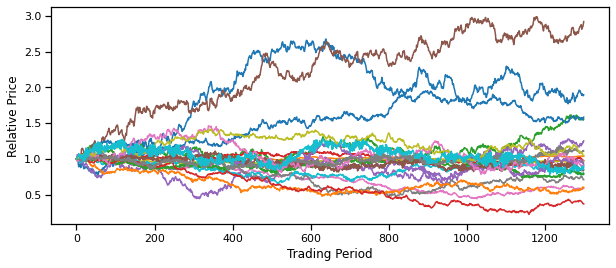

In [9]:
# plot first three of them as example
ax=pd.DataFrame(data).iloc[:,:].plot(legend=False, figsize=(10,4))
ax.set(xlabel='Trading Period', ylabel='Relative Price')
fig=ax.get_figure()
# fig.savefig('syn3.eps')

In [10]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998714,0.999373,1.003100,1.007901,1.015527,1.021153,0.996378,0.990071,1.000176,0.984264,0.997346,1.006084,0.999891,0.998283,1.014209,0.997443,0.988476,0.997833,1.011997,1.000724
2,0.977292,0.996971,1.002700,1.000795,1.058063,1.017531,0.990811,0.984255,1.000087,0.999045,0.999075,1.002997,0.998162,0.996300,1.004386,0.979488,0.964501,1.004280,1.017493,1.023474
3,0.979791,0.994378,1.012159,1.015245,1.057478,1.018814,0.994376,0.988735,0.999774,0.983124,0.998617,1.009705,1.002261,0.993630,1.012329,0.998541,0.981590,0.990830,1.005735,1.027990
4,0.973950,0.993647,1.001013,1.005242,1.027792,1.006828,0.995709,0.971096,1.002401,0.981417,0.981369,1.020700,0.999564,0.983649,1.000590,0.989018,0.989659,1.008635,1.007970,1.036685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1.909866,1.034890,1.577743,0.993462,1.208575,2.825612,0.571655,0.750260,0.968332,0.779731,1.557160,0.583556,0.786380,0.391194,0.954288,0.840456,0.890636,1.082001,1.086836,0.902097
1296,1.891055,1.034723,1.568663,0.970680,1.210655,2.844937,0.587283,0.731536,0.967589,0.794505,1.548392,0.599975,0.791474,0.384677,0.958631,0.835220,0.891721,1.108230,1.066932,0.855549
1297,1.884008,1.035478,1.561133,0.979063,1.241473,2.849994,0.578907,0.721287,0.972099,0.792063,1.555377,0.606355,0.781265,0.372730,0.934885,0.834115,0.910501,1.104747,1.056688,0.861271
1298,1.882842,1.034588,1.540213,0.980521,1.236415,2.886736,0.591532,0.707043,0.967446,0.796347,1.569773,0.600929,0.802134,0.370098,0.950434,0.831020,0.893982,1.115851,1.044374,0.854826


## baselines

### BAH

In [11]:
# set algo parameters
algo = algos.BAH()

# run
result = algo.run(data)

Summary:
    Profit factor: 1.04
    Sharpe ratio: 0.26 ± 0.45
    Ulcer index: 0.42
    Information ratio (wrt UCRP): -2.14
    Appraisal ratio (wrt UCRP): -1.07 ± 0.44
    UCRP sharpe: 0.78 ± 0.50
    Beta / Alpha: 0.92 / -3.639%
    Annualized return: 1.62%
    Annualized volatility: 7.33%
    Longest drawdown: 659 days
    Max drawdown: 8.97%
    Winning days: 51.0%
    Annual turnover: 0.0
        
Total wealth: 1.0864054589298928


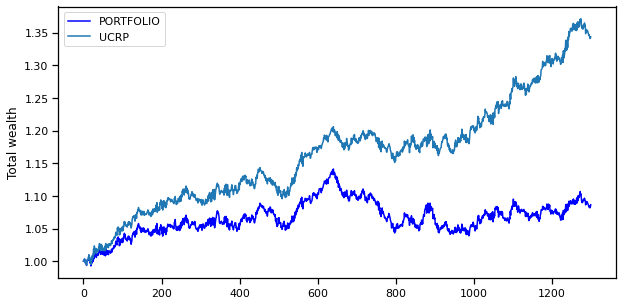

In [12]:
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

### UCRP

In [13]:
# set algo parameters
algo = algos.CRP()

# run
result = algo.run(data)

In [14]:
print(result.summary())
print('Total wealth:', result.total_wealth)
# ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 1.12
    Sharpe ratio: 0.78 ± 0.50
    Ulcer index: 4.00
    Information ratio (wrt UCRP): 0.00
    Appraisal ratio (wrt UCRP): -0.00 ± 0.44
    UCRP sharpe: 0.78 ± 0.50
    Beta / Alpha: 1.00 / -0.000%
    Annualized return: 5.89%
    Annualized volatility: 7.75%
    Longest drawdown: 353 days
    Max drawdown: 4.55%
    Winning days: 51.4%
    Annual turnover: 3.6
        
Total wealth: 1.34347508634296


### PAMR

In [15]:
# set algo parameters
algo = algos.PAMR()

# run
result = algo.run(data)

/home/linaiqi/anaconda3/envs/dgpg/lib/python3.7/site-packages/universal/algos/pamr.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  lam = le / np.linalg.norm(x - x_mean)**2


Summary:
    Profit factor: 33.57
    Sharpe ratio: 16.42 ± 5.13
    Ulcer index: 1659.40
    Information ratio (wrt UCRP): 17.52
    Appraisal ratio (wrt UCRP): 18.84 ± 0.44
    UCRP sharpe: 0.78 ± 0.50
    Beta / Alpha: 4.38 / 949.827%
    Annualized return: 1229621.93%
    Annualized volatility: 59.45%
    Longest drawdown: 9 days
    Max drawdown: 6.90%
    Winning days: 88.2%
    Annual turnover: 518.2
        
Total wealth: 1.253748135929621e+21


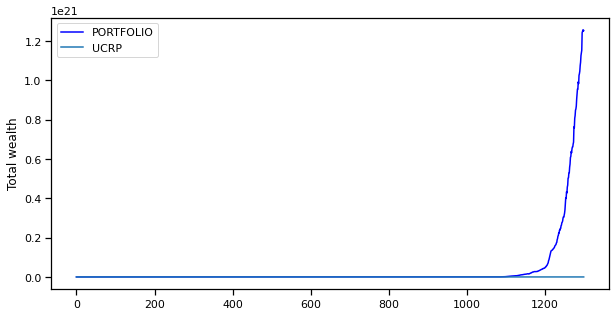

In [16]:
result.fee = 0.0
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

### OLMAR

In [17]:
# set algo parameters
algo = algos.OLMAR(window=5, eps=10)

# run
result = algo.run(data)

Summary:
    Profit factor: 8.18
    Sharpe ratio: 10.42 ± 3.27
    Ulcer index: 334.52
    Information ratio (wrt UCRP): 10.86
    Appraisal ratio (wrt UCRP): 11.03 ± 0.44
    UCRP sharpe: 0.78 ± 0.50
    Beta / Alpha: 3.85 / 651.720%
    Annualized return: 64233.83%
    Annualized volatility: 64.80%
    Longest drawdown: 18 days
    Max drawdown: 11.36%
    Winning days: 70.9%
    Annual turnover: 436.0
        
Total wealth: 307596322275226.56


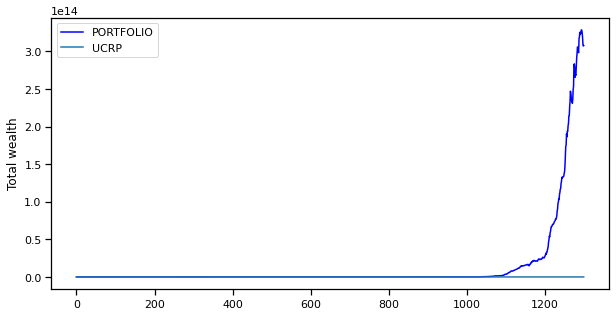

In [18]:
result.fee = 0.0
print(result.summary())
print('Total wealth:', result.total_wealth)
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);